In [2]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance

In [26]:
# Import Data
# Data awal disimpan kedalam frame data
data = pd.read_csv('dataset/datasetFull.csv')
data

,Timestamp,EmailAddress,NamaLengkap,NIM,Angkatan,GolonganUKT,NoHP,IPGanjil,OrganisasiGanjil,KerjaGanjil,SKSGanjil,IPGenap,OrganisasiGenap,KerjaGenap,SKSGenap
0,23/09/2022 16:57,all4yandaru@gmail.com,Liek Allyandaru,123180054,2018,4,82136564484,3.83,Ya,Tidak,21,3.96,Tidak,Tidak,24
1,23/09/2022 18:16,isnan.rizqikurniawan@gmail.com,Isnan Rizqi Kurniawan,123170041,2017,4,81215255331,3.83,Ya,Tidak,23,3.80,Ya,Tidak,21
2,23/09/2022 18:20,michelpiercetahya@gmail.com,Michel Pierce Tahya,123210103,2021,5,85156441564,3.90,Tidak,Tidak,24,3.70,Ya,Tidak,22
3,23/09/2022 18:20,indahyaniomel@gmail.com,Indahyani,123180013,2018,1,-,3.60,Tidak,Tidak,22,2.83,Tidak,Tidak,22
4,23/09/2022 18:20,dilaajengm@gmail.com,Dila Ajeng Meiliawati,123180009,2018,4,81275270774,3.62,Tidak,Tidak,21,3.70,Tidak,Tidak,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,12/10/2022 10:52,anggita.setiyani@gmail.com,Anggita Setiyani Putri,124190037,2019,2,-,3.82,Ya,Tidak,24,3.48,Tidak,Ya,22
206,12/10/2022 11:11,123210098@student.upnyk.ac.id,Aditya Prayoga,123210098,2021,3,Gak usah mas,3.86,Ya,Tidak,24,3.60,Tidak,Tidak,23
207,12/10/2022 13:13,aliyahalmairah1506@gmail.com,A. Aliyah Almairah Syarif Putri,123190003,2019,4,89606347306,3.65,Ya,Tidak,22,3.11,Ya,Tidak,24
208,12/10/2022 15:32,nikolasnanda@gmail.com,Nicholas Nanda Sulaksana,123180049,2018,4,6.28E+12,3.83,Ya,Tidak,21,4.00,Ya,Tidak,21


In [27]:
# Data banyaknya angkatan
angkatan = pd.DataFrame(data['Angkatan'].value_counts()).reset_index()
angkatan = angkatan.rename(columns={'Angkatan': 'Count'})
angkatan = angkatan.rename(columns={'index': 'Angkatan'})
angkatan = angkatan.head(5)
angkatan

,Angkatan,Count
0,2018,65
1,2019,47
2,2020,43
3,2021,42
4,2017,13


In [28]:
# Penghapusan kolom data yang tidak digunakan
columns = ['Timestamp','EmailAddress','NamaLengkap','NIM','NoHP']
dataFilter = data.copy()
dataFilter.drop(columns, inplace= True, axis=1)
# dataFilter.drop(dataFilter[dataFilter.IPGanjil < 3.33].index, inplace=True)
# dataFilter.drop(dataFilter[dataFilter.IPGenap < 2.8].index, inplace=True)
dataFilter = dataFilter.reset_index()

In [29]:
yesNoIndex = {'Ya':1,'Tidak':0}
angkatan = {2021:0,2020:1,2019:2,2018:3,2017:4}
dataFilter = dataFilter.replace(yesNoIndex)
dataFilter = dataFilter.replace(angkatan)
dataFilter

,index,Angkatan,GolonganUKT,IPGanjil,OrganisasiGanjil,KerjaGanjil,SKSGanjil,IPGenap,OrganisasiGenap,KerjaGenap,SKSGenap
0,0,3,4,3.83,1,0,21,3.96,0,0,24
1,1,4,4,3.83,1,0,23,3.80,1,0,21
2,2,0,5,3.90,0,0,24,3.70,1,0,22
3,3,3,1,3.60,0,0,22,2.83,0,0,22
4,4,3,4,3.62,0,0,21,3.70,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...
205,205,2,2,3.82,1,0,24,3.48,0,1,22
206,206,0,3,3.86,1,0,24,3.60,0,0,23
207,207,2,4,3.65,1,0,22,3.11,1,0,24
208,208,3,4,3.83,1,0,21,4.00,1,0,21


In [30]:
dataGanjil = dataFilter[['Angkatan','GolonganUKT','IPGanjil','SKSGanjil','OrganisasiGanjil','KerjaGanjil']]
dataGenap = dataFilter[['Angkatan','GolonganUKT','IPGenap','SKSGenap','OrganisasiGenap','KerjaGenap']]
dataGenap

,Angkatan,GolonganUKT,IPGenap,SKSGenap,OrganisasiGenap,KerjaGenap
0,3,4,3.96,24,0,0
1,4,4,3.80,21,1,0
2,0,5,3.70,22,1,0
3,3,1,2.83,22,0,0
4,3,4,3.70,23,0,0
...,...,...,...,...,...,...
205,2,2,3.48,22,0,1
206,0,3,3.60,23,0,0
207,2,4,3.11,24,1,0
208,3,4,4.00,21,1,0


In [31]:
dataFinal = pd.DataFrame({
    # 'Angkatan'     : dataGenap['Angkatan'],
    'GolonganUKT' : dataGenap['GolonganUKT'],
    'IP' : dataGenap['IPGenap'],
    # 'SKS'     : dataGenap['SKSGenap'],
    # 'Kesibukan' : kesibukan,
    'Organisasi' : dataGenap['OrganisasiGenap'],
    'Kerja' : dataGenap['KerjaGenap'],
    })
dataFinal

,GolonganUKT,IP,Organisasi,Kerja
0,4,3.96,0,0
1,4,3.80,1,0
2,5,3.70,1,0
3,1,2.83,0,0
4,4,3.70,0,0
...,...,...,...,...
205,2,3.48,0,1
206,3,3.60,0,0
207,4,3.11,1,0
208,4,4.00,1,0


In [32]:
clf = LocalOutlierFactor(n_neighbors=5, contamination="auto")
X = dataFinal[['IP','Kerja']].values
# dataW= np.array(dataFinal[['GolonganUKT']])
dataX= np.array(dataFinal[['IP']])
# dataY= np.array(dataFinal[['Organisasi']])
dataZ= np.array(dataFinal[['Kerja']])

y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_
round_off_values = np.around(X_scores, decimals =2)
new =round_off_values*(-1)

In [33]:
datas = pd.DataFrame(new)
datas

,0
0,1.00
1,1.00
2,1.00
3,0.95
4,1.00
...,...
205,1.08
206,1.00
207,1.09
208,1.00


In [34]:
datas[0]
outlier = []
i = 0
for score in datas[0]:
    if score >= 1.5:
        outlier.append(i)
    i += 1

print(outlier)

[7, 9, 12, 18, 20, 24, 25, 33, 58, 76, 89, 113, 125, 132, 142, 160, 169, 182, 190, 201]


In [35]:
dataFinal.drop(outlier, inplace=True)

In [36]:
dataFinal

,GolonganUKT,IP,Organisasi,Kerja
0,4,3.96,0,0
1,4,3.80,1,0
2,5,3.70,1,0
3,1,2.83,0,0
4,4,3.70,0,0
...,...,...,...,...
205,2,3.48,0,1
206,3,3.60,0,0
207,4,3.11,1,0
208,4,4.00,1,0


In [37]:
in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

[7.76315786e-10 7.76315786e-10 7.76315786e-10 3.21770333e-10
 7.76315786e-10 7.76315786e-10 7.76315786e-10 1.00000000e+00
 1.14668615e-09 9.35964901e-09 8.13352821e-10 7.76315786e-10
 6.46655143e-09 1.40131578e-09 1.40131578e-09 2.94298243e-09
 7.76315786e-10 7.76315786e-10 6.66666666e-01 3.44298242e-09
 9.40131568e-09 7.76315786e-10 7.76315786e-10 3.56996655e-09
 6.67037797e-09 5.22607653e-09 5.17056528e-10 4.98538011e-10
 6.00877190e-10 1.14668615e-09 2.31798243e-09 0.00000000e+00
 1.39650119e-10 1.57852284e-08 7.76315786e-10 7.76315786e-10
 8.55680864e-10 1.18002060e-09 7.76315786e-10 1.23464911e-09
 4.15476186e-09 1.23464911e-09 7.76315786e-10 3.44298242e-09
 8.05727550e-10 7.76315786e-10 7.76315786e-10 9.77554174e-10
 7.76315786e-10 7.76315786e-10 7.76315786e-10 7.76315786e-10
 1.40131578e-09 4.98538011e-10 2.89271789e-09 3.21770333e-10
 2.91557448e-09 6.33518582e-10 6.66666666e-01 6.00877190e-10
 7.76315786e-10 1.51705652e-09 1.07934609e-09 7.76315786e-10
 1.25250626e-09 7.763157

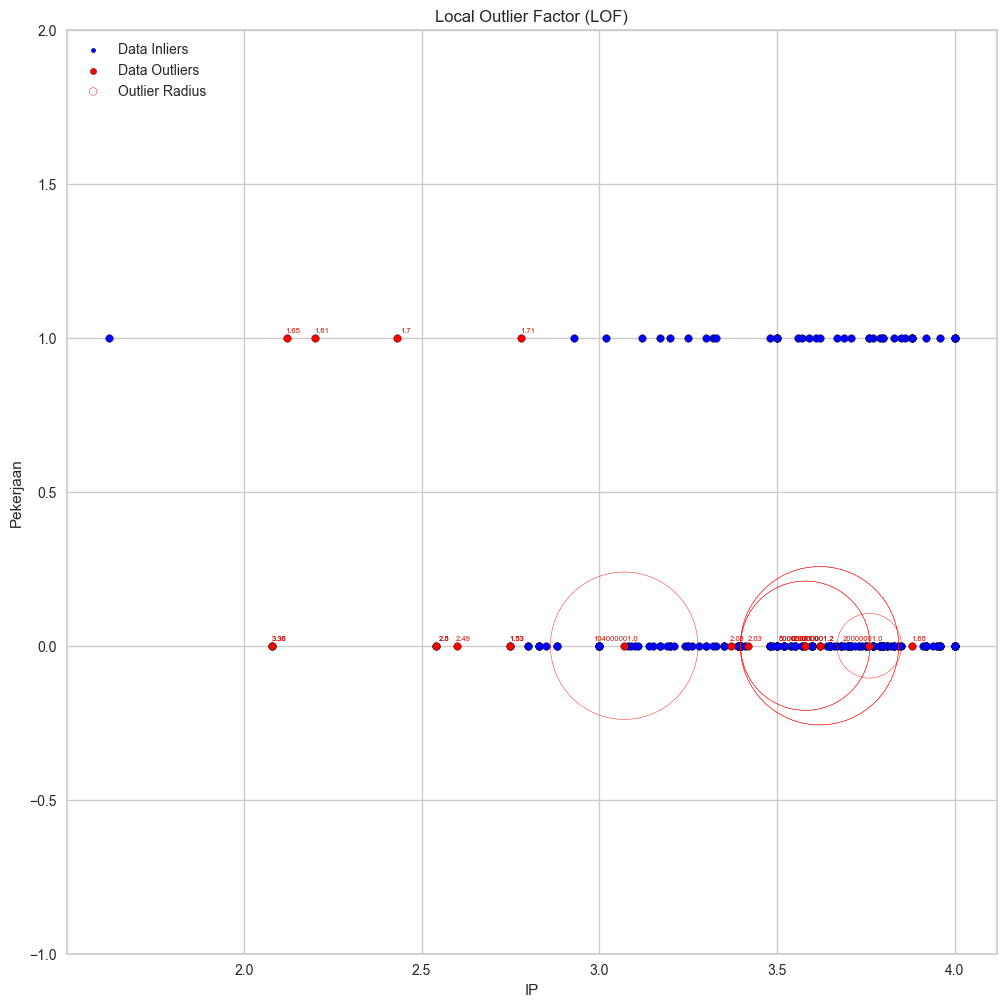

In [38]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30, label='Data Inliers')
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30, label='Data Outliers')
# radius
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
print(radius)
c = plt.scatter(dataX, dataZ, s=radius * 13000, edgecolors='red',facecolors='none', label='Outlier Radius')
#label
for x_pos, y_pos, label in zip(dataX,dataZ,new):
    if label>=1.5:
        print(label)
        plt.annotate(label,             
                xy=(x_pos, y_pos),
                xytext=(10,5),     
                textcoords='offset points', 
                ha='right',         
                va='center',fontsize=5.5,color='r')
plt.axis('tight')
plt.xlabel('IP');
plt.ylabel('Pekerjaan');
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [30]
plt.ylim((-1, 2))
plt.show()

NameError: name 'dataW' is not defined

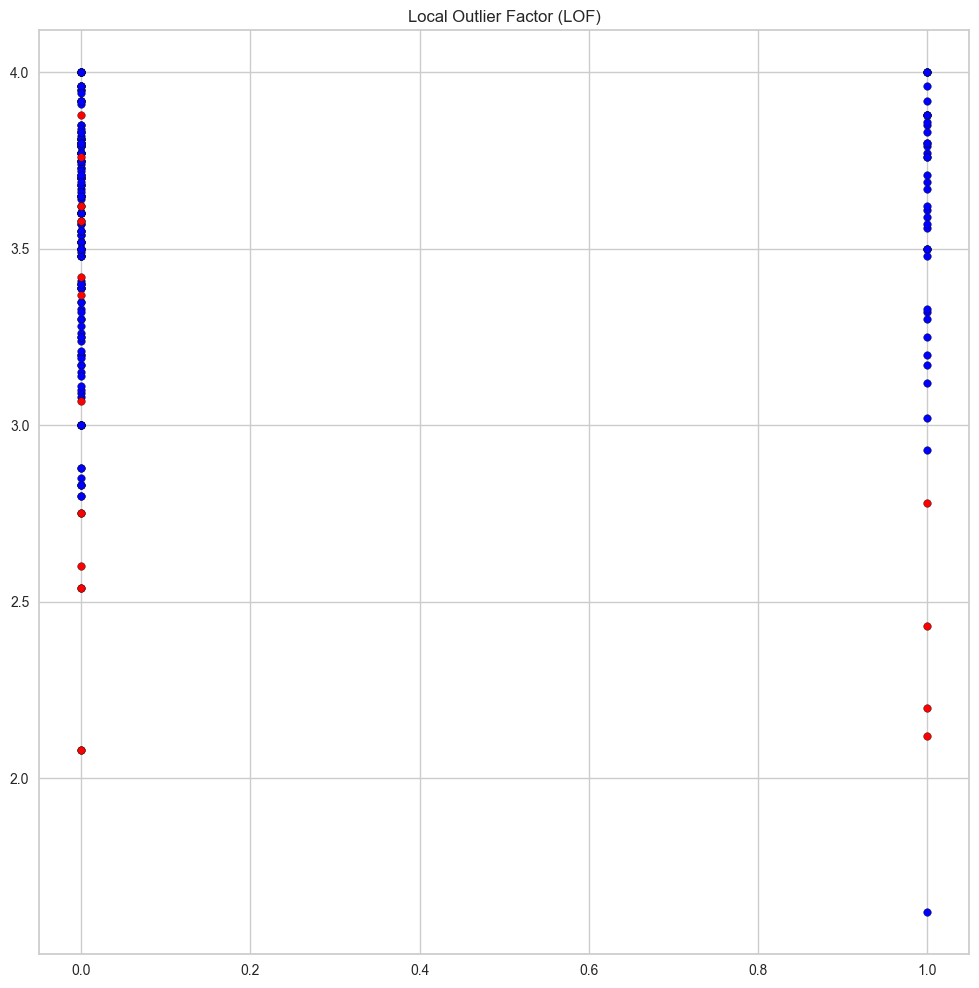

In [39]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 1], X[in_mask, 0], c = 'blue',
                edgecolor = 'k', s = 30, label='Data Inliers')
# outliers
b = plt.scatter(X[out_mask, 1], X[out_mask, 0], c = 'red',
                edgecolor = 'k', s = 30, label='Data Outliers')
# radius
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
c = plt.scatter(dataX, dataW, s=radius * 1300, edgecolors='red',facecolors='none', label='Outlier Radius')
#label
for x_pos, y_pos, label in zip(dataX,dataW,new):
    if label>=1.5:
        plt.annotate(label,             
                xy=(x_pos, y_pos),
                xytext=(10,5),     
                textcoords='offset points', 
                ha='right',         
                va='center',fontsize=5.5,color='r')
plt.axis('tight')
plt.xlabel('IP');
plt.ylabel('GolonganUKT');
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [30]
plt.ylim((-1, 9))
plt.show()

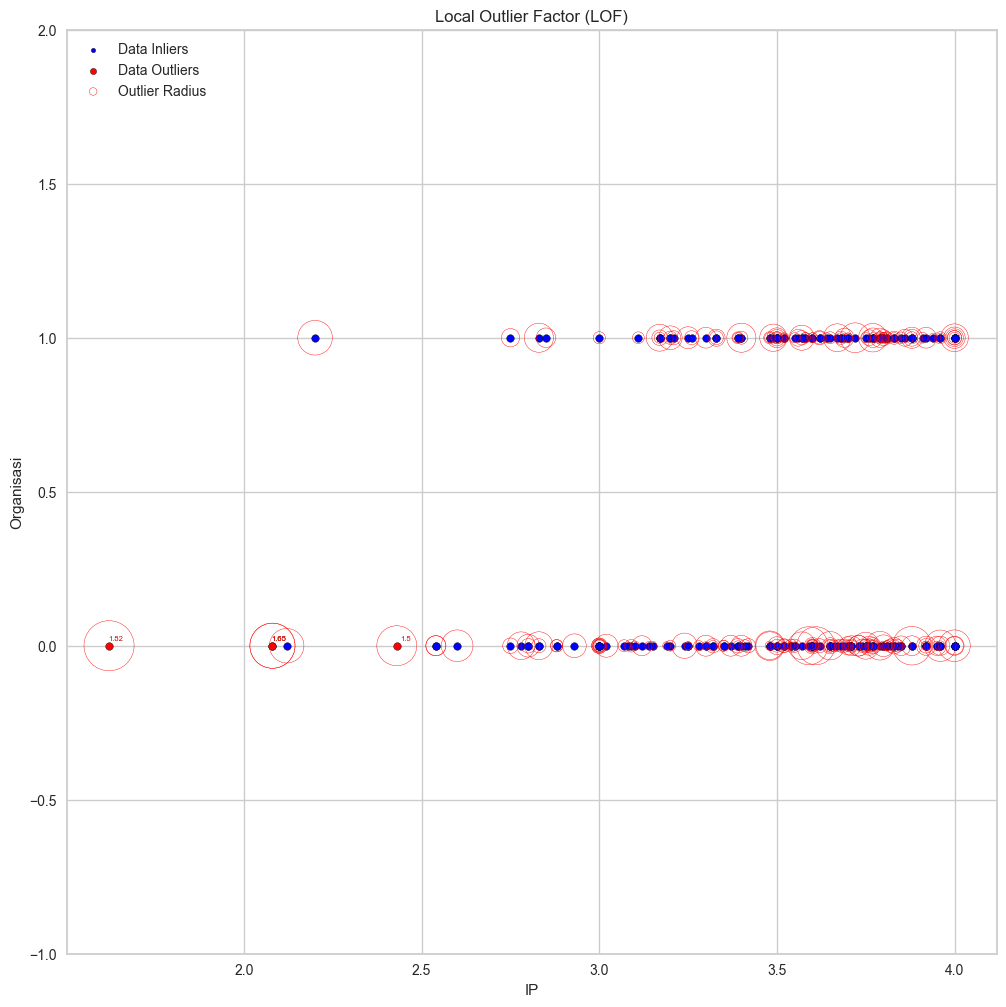

In [ ]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 1], X[in_mask, 2], c = 'blue',
                edgecolor = 'k', s = 30, label='Data Inliers')
# outliers
b = plt.scatter(X[out_mask, 1], X[out_mask, 2], c = 'red',
                edgecolor = 'k', s = 30, label='Data Outliers')
# radius
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
c = plt.scatter(dataX, dataY, s=radius * 1300, edgecolors='red',facecolors='none', label='Outlier Radius')
#label
for x_pos, y_pos, label in zip(dataX,dataY,new):
    if label>=1.5:
        plt.annotate(label,             
                xy=(x_pos, y_pos),
                xytext=(10,5),     
                textcoords='offset points', 
                ha='right',         
                va='center',fontsize=5.5,color='r')
plt.axis('tight')
plt.xlabel('IP');
plt.ylabel('Organisasi');
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [30]
plt.ylim((-1, 2))
plt.show()

In [ ]:
scatter_fig = px.scatter_3d(X, x=X[in_mask, 0], y=X[in_mask, 1], z=X[in_mask, 2])
scatter_fig = scatter_fig + px.scatter_3d(X, x=X[out_mask, 0], y=X[out_mask, 1], z=X[out_mask, 2])
scatter_fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


# plt.figure(figsize=(12,12))
# # plot the level sets of the decision function

# plt.title("Local Outlier Factor (LOF)")
# # inliers
# a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
#                 edgecolor = 'k', s = 30, label='Data Inliers')
# # outliers
# b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
#                 edgecolor = 'k', s = 30, label='Data Outliers')
# # radius
# radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
# c = plt.scatter(dataX, dataY, s=radius * 1300, edgecolors='red',facecolors='none', label='Outlier Radius')
# #label
# for x_pos, y_pos, label in zip(dataX,dataY,new):

# plt.axis('tight')
# plt.xlabel('IP');
# plt.ylabel('Pekerjaan');
# legend = plt.legend(loc='upper left')
# legend.legendHandles[0]._sizes = [10]
# legend.legendHandles[1]._sizes = [20]
# legend.legendHandles[2]._sizes = [30]
# plt.ylim((-1, 2))
# plt.show()

TypeError: unsupported operand type(s) for +: 'Figure' and 'Figure'

In [ ]:
import pyod
import sklearn
import numpy as np
X_train, y_train, X_test, y_test = \
        generate_data(n_train=200,
                      n_test=100,
                      n_features=5,
                      contamination=0.1,
                      random_state=3) 
X_train = X_train * np.random.uniform(0, 1, size=X_train.shape)
X_test = X_test * np.random.uniform(0,1, size=X_test.shape)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(novelty=False)
y_pred = clf.fit_predict(X_train)

# Convert y_pred to the same convention as pyod.
# In sklearn, -1 is an outlier. In pyod, 1 is an outlier.
y_pred = y_pred == -1
n_errors = (y_pred != y_train).sum()
print("Error rate:", n_errors/len(y_pred))

C:\Users\Pegipegi\AppData\Local\Temp/ipykernel_31120/3828794272.py:9: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



AttributeError: 'bool' object has no attribute 'sum'

In [89]:
data = {'IP':  [3.94, 3.48, 2.83, 4, 3.77, 3.92, 3.48, 2.75, 3.68],
        'Organisasi': [1,0,0,1,1,0,1,0,0],
        'Kerja': [0,1,0,0,1,0,0,0,1],
        }

df = pd.DataFrame(data)
df
dataFinals = df.copy()

In [90]:
df

,IP,Organisasi,Kerja
0,3.94,1,0
1,3.48,0,1
2,2.83,0,0
3,4.00,1,0
4,3.77,1,1
5,3.92,0,0
6,3.48,1,0
7,2.75,0,0
8,3.68,0,1


In [91]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state= 42, n_init=1)
kmeans.fit(df)
labels = kmeans.predict(df)
samplesCentroids = kmeans.cluster_centers_

In [92]:
kmeans.n_iter_

2

In [93]:
samplesCentroids

array([[3.80666667, 1.        , 0.        ],
       [3.7125    , 0.25      , 0.75      ],
       [2.79      , 0.        , 0.        ]])

In [94]:
dataFinals.insert(3,"Cluster", kmeans.labels_.astype(str))

In [95]:
dataFinals

,IP,Organisasi,Kerja,Cluster
0,3.94,1,0,0
1,3.48,0,1,1
2,2.83,0,0,2
3,4.00,1,0,0
4,3.77,1,1,1
5,3.92,0,0,1
6,3.48,1,0,0
7,2.75,0,0,2
8,3.68,0,1,1


In [88]:
# Silhouette Score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

s_cluster = 0
max_score = 0

results_sil = {}

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)

    results_sil.update({num_clusters: silhouette_avg})

    if silhouette_avg > max_score:
      max_score = silhouette_avg
      s_cluster = num_clusters

#Visualize
fig_silhouette = px.line( x= list(results_sil.keys()), y=list(results_sil.values()), labels={'x' :'Number of Clusters', 'y' :'Silhouette Score'})
fig_silhouette

# sil_cluster = "Optimal Cluster = {}, with {} score.".format(s_cluster, max_score)